<a href="https://colab.research.google.com/github/ahtape/pcd-assignment03/blob/main/PCD_Assignment03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The 3rd Assignment

Implement one of the segmentation methods and several operation of morphological methods without using library. Comparing the segmentation result with and without applying morphological processing.

Atha Putra Fausta

24/538657/PA/22864

In [1]:
# import dependencies
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

## A. Segmentation

### 1. Global Thresholding

To do global thersholding, first we need to determine a global threshold T that is in the middle between two gray value distribution.

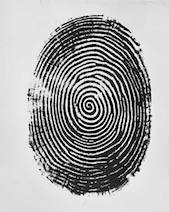

In [2]:
# Import dependencies
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt

# Load image
image_path = '/content/fingerprint.jpg'
image_in = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
cv2_imshow(image_in)



/tmp/ipython-input-1752255194.py:2: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(image_in.ravel(),256,[0,256]); plt.show()


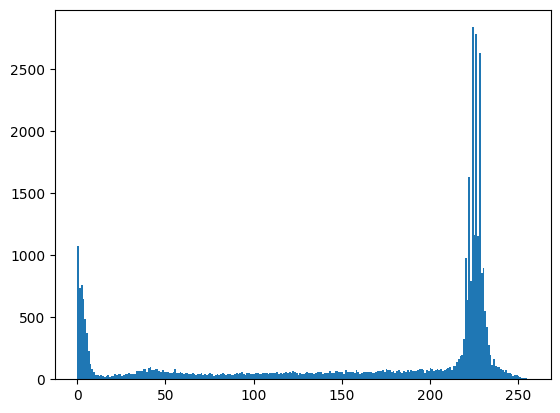

In [3]:
# Show histogram
plt.hist(image_in.ravel(),256,[0,256]); plt.show()

From the histogram, we can estimate midpoint between the two peak is at around 100, so we set T = 100. After that, we will group the pixel into two class, 0 and 255 with the defined thershold value.
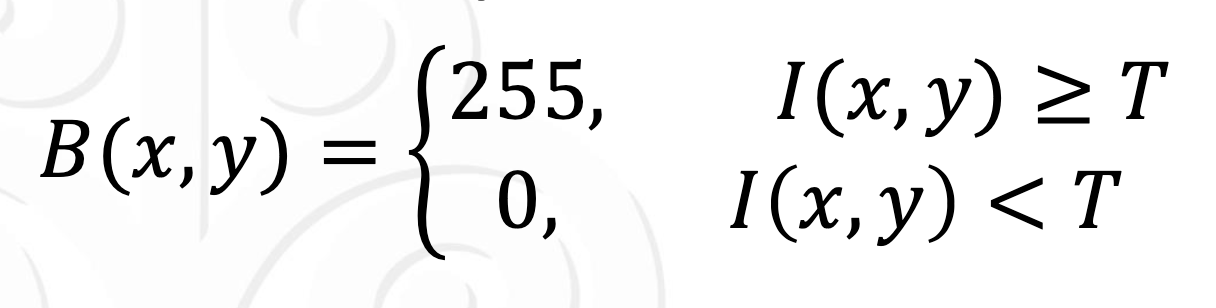




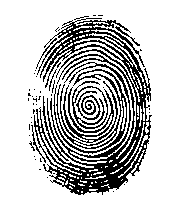

In [4]:
# Thresholding using basic thresholding (global threshold)

threshold = 100

# get image size
[img_h, img_w] = image_in.shape

# segmentation
image_out = np.zeros((img_h, img_w))
for i in range(img_h):
  for j in range(img_w):
    image_out[i, j] = 0 if image_in[i, j] <= threshold else 255

cv2_imshow(image_out)

Using global thresholding, we can separate the foreground (the fingerprint), represented by pixel value of 0, from the background, represented by pixel value of 255.

##  Morphological Processing

Morphological processing is used to further process the segmented image. The basic morphological operators are dilation, erosion, opening, and closing.

### 1. Dilation


Dilation is used to goradually enlarge the region boundaries of foreground pixels. Dilation is done by setting the input background pixel to foreground value if at least one pixel in the structuring element match with a foreground pixel.

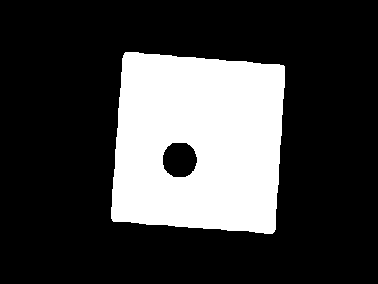

In [5]:
# Load image
image_path = '/content/dilation.png'
image_in = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
cv2_imshow(image_in)

image input:


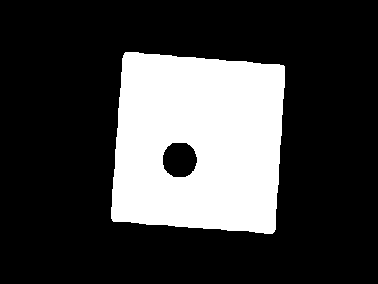

dilated image:


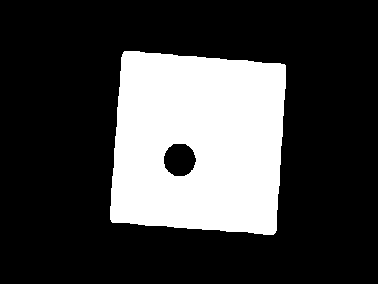

In [6]:
# Dilation

# kernel
kernel = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1],
])

# get image size
[img_h, img_w] = image_in.shape

# Segmentation
# Padding
pad = kernel.shape[0] // 2
padded = np.pad(image_in, pad, mode='constant', constant_values=0)

dilated = np.zeros((img_h, img_w))

for i in range(image_in.shape[0]):
    for j in range(image_in.shape[1]):
        region = padded[i:i+kernel.shape[0], j:j+kernel.shape[1]] # extract region of interest
        if np.any(region[kernel == 1] == 255): # if any overlap between white pixels and kernel
            dilated[i, j] = 255

print("image input:")
cv2_imshow(image_in)
print("dilated image:")
cv2_imshow(dilated)


Comparing the image in and image out, we can see that the foreground (white square) is dilated, as the square is getting bigger and the circe inside the square appears smaller in the dilated image.

Dilation can also be used for edge detection, by substraction the dilated image with the original image.

Edge detection:


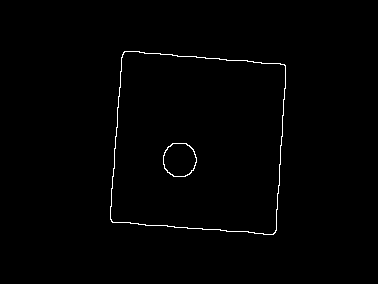

In [7]:
# Edge detection with dilation

dilation_edge = dilated - image_in
dilation_edge = np.array(dilation_edge, dtype = np.uint8)

print('Edge detection:')
cv2_imshow(dilation_edge)

### 2. Erosion

Opposed to dilation, erosion erodes away the region boundaries of foreground pixels. Erosion is done by setting the input foreground pixel to background value if at least one pixel in the structuring element did not match with the foreground pixel.

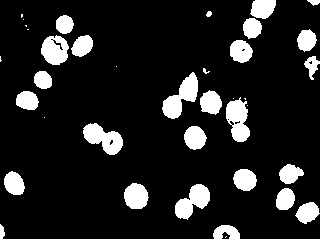

In [8]:
# Load image
image_path = '/content/bloodcell.png'
image_in = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
cv2_imshow(image_in)

image input:


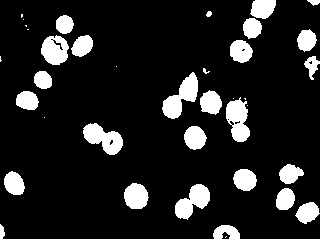

eroded image:


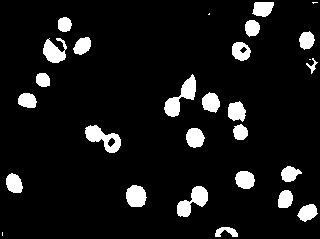

In [9]:
# Erosion

# kernel
kernel = np.array([
    [0, 0, 1, 0, 0,],
    [0, 1, 1, 1, 0,],
    [1, 1, 1, 1, 1,],
    [0, 1, 1, 1, 0,],
    [0, 0, 1, 0, 0,],
])

# get image size
[img_h, img_w] = image_in.shape

pad = kernel.shape[0] // 2
padded = np.pad(image_in, pad, mode='constant', constant_values=0)

eroded = np.zeros((img_h, img_w))

for i in range(image_in.shape[0]):
    for j in range(image_in.shape[1]):
        region = padded[i:i+kernel.shape[0], j:j+kernel.shape[1]] # Extract region under the kernel
        # Erosion: all kernel-covered pixels must be 255
        if np.all(region[kernel == 1] == 255):
            eroded[i, j] = 255
        else:
            eroded[i, j] = 0

print("image input:")
cv2_imshow(image_in)
print("eroded image:")
cv2_imshow(eroded)

Comparing the image in and image out, we can see that the foreground (white square) is eroded, as the blood cell shrink and now separated from groups.

Erosion can also be used for edge detection, by substraction the original image with the eroded image.

Edge detection:


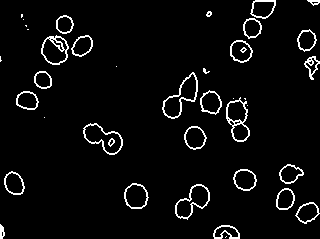

In [10]:
# Edge detection with erosion

erision_edge = image_in - eroded
erision_edge = np.array(erision_edge, dtype = np.uint8)

print('Edge detection:')
cv2_imshow(erision_edge)

### 3. Opening

Similar to erosion, opening erodes away the region boundaries of foreground pixels. However, opening is less destructive than erosion as it performed by using erosion followed by dilation using a same kernel. Opening is used to preserve foreground regions that have a similar shapae to the kernel, such as shape selection and object separation.

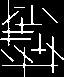

In [11]:
# Load image
image_path = '/content/shape_selection.png'
image_in = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
cv2_imshow(image_in)

image input:


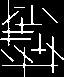

opened image:


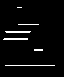

In [12]:
# Shape selection by opening

# kernel
kernel = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
])

# get image size
[img_h, img_w] = image_in.shape

# Erosion
pad = kernel.shape[0] // 2
padded = np.pad(image_in, pad, mode='constant', constant_values=0)

eroded = np.zeros((img_h, img_w))

for i in range(image_in.shape[0]):
    for j in range(image_in.shape[1]):
        region = padded[i:i+kernel.shape[0], j:j+kernel.shape[1]] # Extract region under the kernel
        # Erosion: all kernel-covered pixels must be 255
        if np.all(region[kernel == 1] == 255):
            eroded[i, j] = 255
        else:
            eroded[i, j] = 0

# Dilation
pad = kernel.shape[0] // 2
padded = np.pad(eroded, pad, mode='constant', constant_values=0)

opened = np.zeros((img_h, img_w))

for i in range(eroded.shape[0]):
    for j in range(eroded.shape[1]):
        region = padded[i:i+kernel.shape[0], j:j+kernel.shape[1]] # extract region of interest
        if np.any(region[kernel == 1] == 255): # if any overlap between white pixels and kernel
            opened[i, j] = 255

print("image input:")
cv2_imshow(image_in)
print("opened image:")
cv2_imshow(eroded)

Comparing the image in and image out, we can see that only the horizontal line is selected after doing opening.

### 4. Closing



Similar to dilation, closing  is used to  enlarge the region boundaries of foreground pixels. However, closing is less destructive than dilation as it performed by using dialtion followed by erosion using a same kernel. Opening is used to preserve background regions that have a similar shape to the kernel, such as filling holes and part removing.

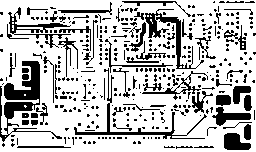

In [13]:
# Load image
image_path = '/content/pcb.png'
image_in = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
cv2_imshow(image_in)

image input:


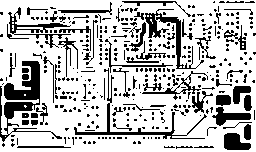

opened image:


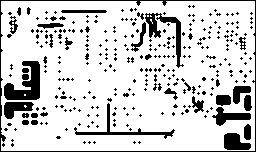

In [14]:
# Part removing by closing

# kernel
kernel = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0],
])

# get image size
[img_h, img_w] = image_in.shape

# Dilation
pad = kernel.shape[0] // 2
padded = np.pad(image_in, pad, mode='constant', constant_values=0)

dilated = np.zeros((img_h, img_w))

for i in range(image_in.shape[0]):
    for j in range(image_in.shape[1]):
        region = padded[i:i+kernel.shape[0], j:j+kernel.shape[1]] # extract region of interest
        if np.any(region[kernel == 1] == 255): # if any overlap between white pixels and kernel
            dilated[i, j] = 255

# Erosion
pad = kernel.shape[0] // 2
padded = np.pad(dilated, pad, mode='constant', constant_values=0)

opened = np.zeros((img_h, img_w))

for i in range(dilated.shape[0]):
    for j in range(dilated.shape[1]):
        region = padded[i:i+kernel.shape[0], j:j+kernel.shape[1]] # Extract region under the kernel
        # Erosion: all kernel-covered pixels must be 255
        if np.all(region[kernel == 1] == 255):
            opened[i, j] = 255
        else:
            opened[i, j] = 0

print("image input:")
cv2_imshow(image_in)
print("opened image:")
cv2_imshow(opened)

Comparing the image in and image out, we can see that only the horizontal line is selected after doing opening.

# References

https://internationalsecurityjournal.com/types-of-fingerprints/

PPT Pak Wahyono